#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Load Data

In [4]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Transform Data

In [7]:
# Re-map "Gender" column
data["Gender"] = data["Gender"].map({"Male":1, "Female":0})
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [9]:
# Transformation of "EstimatedSalary" column
from scipy.stats import boxcox

data["Salary_Transformed"] = boxcox(data["EstimatedSalary"])[0]
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Salary_Transformed
0,15624510,1,19,19000,0,201.646342
1,15810944,1,35,20000,0,206.524609
2,15668575,0,26,43000,0,294.864899
3,15603246,0,27,57000,0,336.091372
4,15804002,1,19,76000,0,384.076979


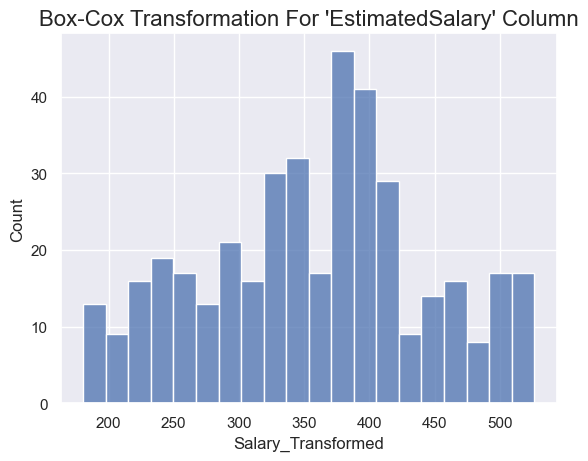

In [13]:
# Plot transformed data
sns.histplot(data, x="Salary_Transformed", bins=20)
plt.title("Box-Cox Transformation For 'EstimatedSalary' Column", fontsize=16)
plt.show()

In [15]:
# Scale "EstimatedSalary" and "Age" columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns_to_scale = data[["Age", "Salary_Transformed"]]
scaler.fit(columns_to_scale)
data[["Age_Scaled", "Salary_Transformed_Scaled"]] = scaler.fit_transform(columns_to_scale)
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Salary_Transformed,Age_Scaled,Salary_Transformed_Scaled
0,15624510,1,19,19000,0,201.646342,-1.781797,-1.809254
1,15810944,1,35,20000,0,206.524609,-0.253587,-1.752550
2,15668575,0,26,43000,0,294.864899,-1.113206,-0.725701
3,15603246,0,27,57000,0,336.091372,-1.017692,-0.246493
4,15804002,1,19,76000,0,384.076979,-1.781797,0.311281


#### Export For Model

In [19]:
# Rearracnge columns
data_for_model = data[['Gender', 'Age_Scaled', 'Salary_Transformed_Scaled', 'Purchased']]

In [21]:
# Export processed data for modeling
data_for_model.to_csv("processed_data.txt", sep="|", index=False)

In [23]:
# Save "scaler" object for use in "Modeling" notebook
%store scaler

Stored 'scaler' (StandardScaler)


In [27]:
max(data["Salary_Transformed"])

526.306716191518